## Final Project Submission

Please fill out:
* Student name: Keene Kelderman
* Student pace: Self-paced
* Scheduled project review date/time: 
* Instructor name: Eli Thomas
* Blog post URL: https://hkkelderman.github.io/king_county_housing_sales_eda


# Objective

To create a model that can be used to predict the sale prices of houses sold in King County, WA.

# Methodology

I used the OSEMN data science process to work through this data and develop a useable model to predict the sale prices of houses sold in King County, WA.

### OSEMN Process

* Obtain
* Scrub
* Explore
* Model
* Interpret

### Libraries

Before I begin, I need to import the libraries necessary for me to load, visualize, and model the King County dataset. 

In [1]:
import warnings; warnings.simplefilter('ignore')

#Data exploration and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='darkgrid')

#Regression Analysis and Model Generation
from sklearn.preprocessing import LabelBinarizer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# 1.0 - Obtain

The first step in the process is to load in the dataset to my Jupyter Notebook.

In [2]:
#Using the pandas library to import the data
data = pd.read_csv('kc_house_data.csv')

In [3]:
#Now I will use the .head() method to quickly check and make sure the data loaded in correctly.
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#Great, the data loaded in correctly. Now let's see what the columns look like:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Below are the columns with a breif description found in the 'kc_house_data.csv'. The descriptions for each column were provided to me by the source, I've edited them slightly so they sound coherent.

* **id** - Unique ID for house
* **dateDate** - Date house was sold
* **pricePrice** -  Price of sale (our prediction target)
* **bedroomsNumber** -  Number of bedrooms in the house
* **bathroomsNumber** -  Number of bathrooms in the house
* **sqft_livingsquare** -  Area of the house (in square feet)
* **sqft_lotsquare** -  Area of the lot (in square feet)
* **floorsTotal** -  Number of floors in the house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is (Overall)
* **grade** - Overall grade given to the housing unit, based on King County grading system
* **sqft_above** - Area of the house, apart from the basement (in square feet)
* **sqft_basement** - Area of the basement (in square feet)
* **yr_built** - Year the house was built
* **yr_renovated** - Year when house was renovated
* **zipcode** - Zipcode
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## 1.1 - Obtain Summary

I used the pandas library to read the data into a dataframe. I then checked to make sure the data loaded correctly by calling '.head()' on the data. Finally, I checked to see the headers for each column and pulled in the column descriptions provided to me.

# 2.0 - Scrub

With the data properly loaded into my Notebook, I can start the cleaning process.

In [5]:
#The first thing I'll check is the overall structure of the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Okay, so the data has 21 columns, made up of 19 numerical columns and 2 object columns. Right off the bat, I can see that the two object columns, 'date' and 'sqft_basement' should probably be changed to date and float type, respectively. Before I do that, I want to check the value counts of all the columns first.

## 2.1 - Data Types

In [6]:
cols = data.columns

for col in cols:
    print('Values for column {}'.format(col))
    print(data[col].value_counts().head(5))
    print('\n')

Values for column id
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


Values for column date
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


Values for column price
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
Name: price, dtype: int64


Values for column bedrooms
3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


Values for column bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
Name: bathrooms, dtype: int64


Values for column sqft_living
1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


Values for column sqft_lot
5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: int64


Values for column floors
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
Name: floors, dtype: int64


Values for co

Okay, so after running a value check on each column in the dataset, I noticed the following:
* First, the 'sqft_basement' column has missing data in the form of "?". This is probably why the column was formatted as an object.
* Second, based off of the first few value counts in the 'id' column, it looks like there might be some duplicate data.

In [7]:
#Changing 'date' column to date type.
data.date = pd.to_datetime(data.date)

#Replacing the '?' in 'sqft_basement', then converting to integer.
data.loc[data.sqft_basement == '?', 'sqft_basement'] = 0.0
data.sqft_basement = data.sqft_basement.astype('float64')

## 2.2 - Duplicates

Now I'm going to check the dataset for duplicates.

In [8]:
#I want to see how many duplicates there are, since it seemed like there were based off of the
#'id' column
duplicates = data[data.duplicated()]
duplicates.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Well that's weird. In the value count check for each column, some house IDs had counts of two and three, but the duplicate check says there are no duplicates. I'm going to filter the dataset using one the IDs I know to have multiple rows.

In [9]:
data.loc[data['id'] == 795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


It looks like the "duplicate entries" are the same houses being sold at different dates and different prices. I'm going to leave them in the dataframe and move on to the missing values.

## 2.3 - Missing Values

Now to check for missing values.

In [10]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Three columns are missing values: 'waterfront', 'view', and 'yr_renovated'. I need to figure out how to deal with each column with missing values.

In [11]:
columns = ['waterfront', 'view', 'yr_renovated']

for col in columns:
    print('Values for column {}'.format(col))
    print(data[col].value_counts(normalize=True).head(5))
    print('\n')

Values for column waterfront
0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64


Values for column view
0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64


Values for column yr_renovated
0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
Name: yr_renovated, dtype: float64




For all of these columns, 0.0 is the most common value, so it makes sense to replace the NaNs in these columns with 0.0.

In [12]:
data.waterfront.fillna(0, inplace = True)
data.view.fillna(0, inplace = True)
data.yr_renovated.fillna(0, inplace = True)

## 2.4 - Scrub Summary

I checked the structure of my data and found that some columns had missing data, that the dataset looked to contain duplicate data, and found that some columns had been incorrectly formatted. I then replaced all missing values with 0.0 (the most common value found in each of the columns with missing data), I changed the two object columns to the correct type, and then recognized that there weren't exact duplicates in the dataset, but that some houses had been sold multiple times and at different prices.

# 3.0 - Explore

Finally, with the data all clean, I can start exploring the data. As I explore my data, I will look to answer the following questions:
* Does renovating a house increase the sale value of a house? And if it does, what types of renovations cause the largest increase in sale value?
* How big a role does location play into the housing market? Do waterfront properties sell for more?
* More people seem to be downsizing their lives. Getting rid of cars, having less stuff, moving to cities, and buying smaller homes. Does the housing data in King County support this? Are more people buying smaller houses?

## 3.1 - Distributions

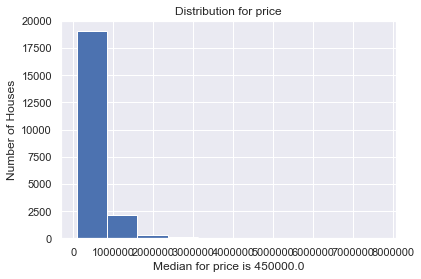

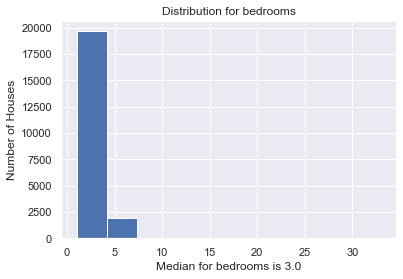

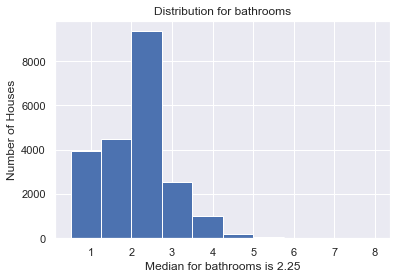

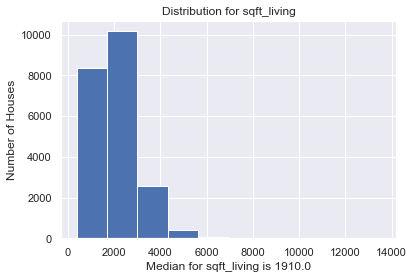

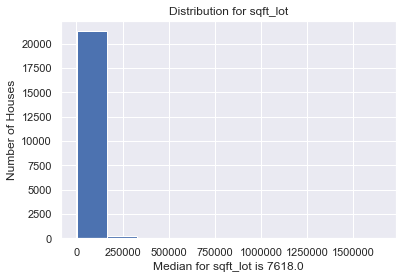

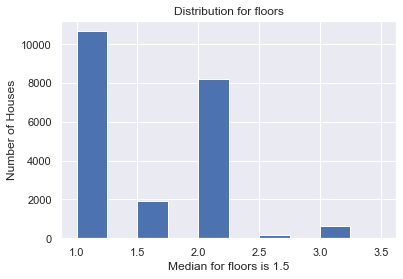

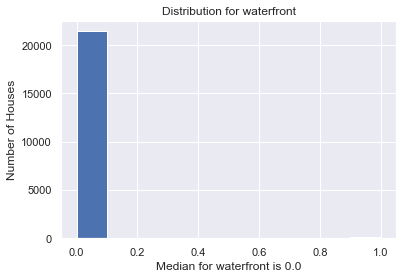

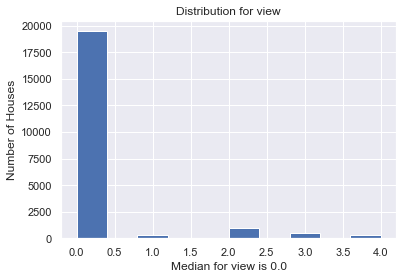

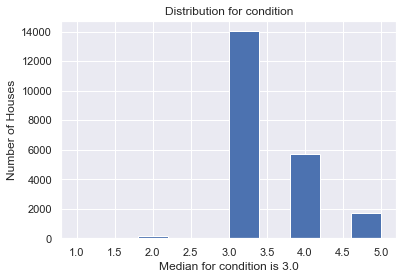

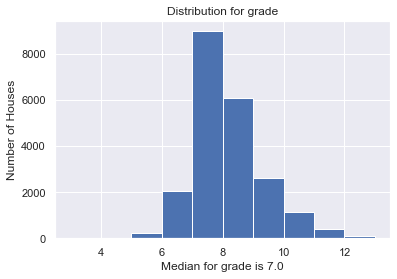

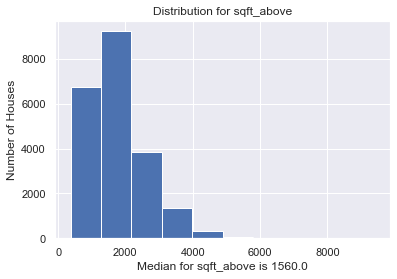

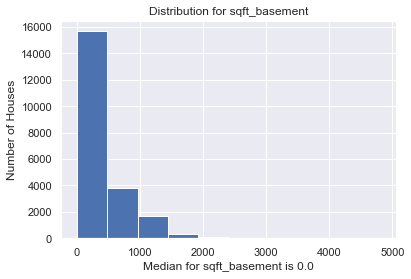

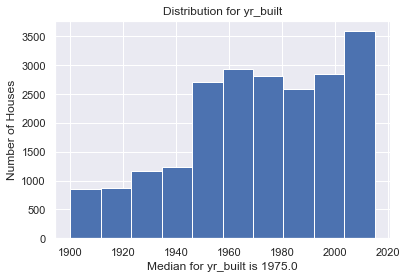

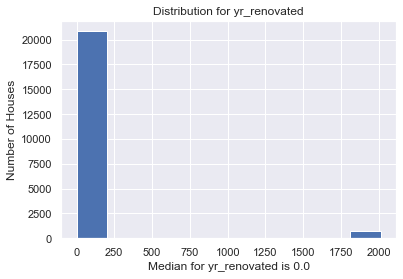

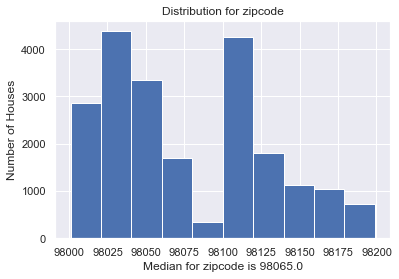

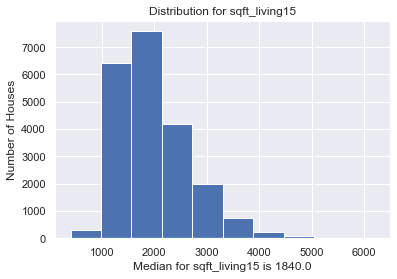

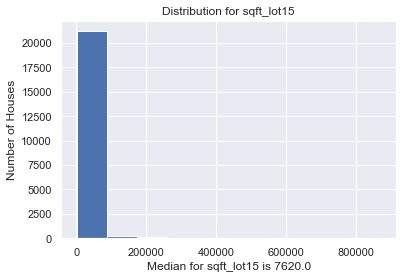

In [13]:
#Not all the columns in the dataset will be used later to predict housing prices, so let's
#remove some of them now (though they may be used later for to answer some of my questions)
col_rmv = ['id', 'lat', 'long', 'date']

data_pred = data.drop(columns = col_rmv)

#Now lets check out the distribution for each of these variables with some histograms
pred_columns = data_pred.columns

for col in pred_columns:
    data_pred[col].hist()
    plt.title('Distribution for {}'.format(col))
    plt.xlabel('Median for {} is {}'.format(col, data_pred[col].median()))
    plt.ylabel('Number of Houses')
    plt.show()

## 3.2 - Scatterplots

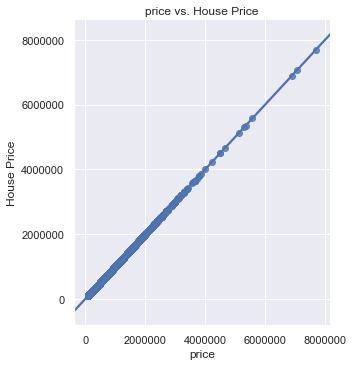

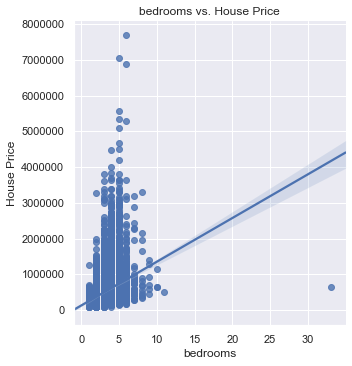

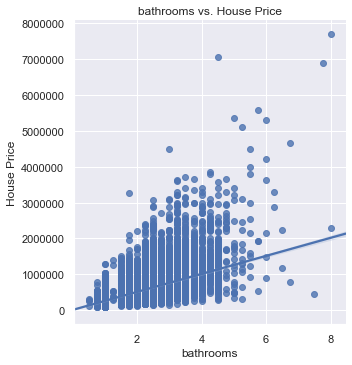

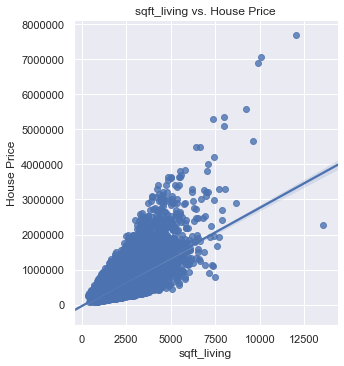

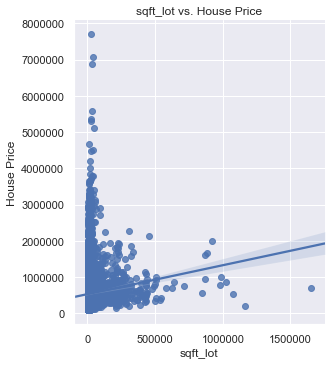

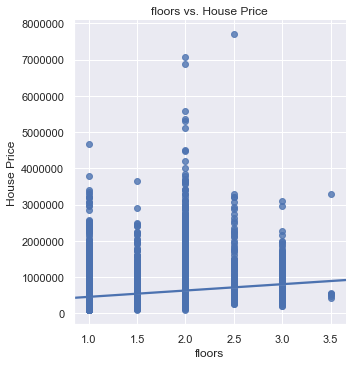

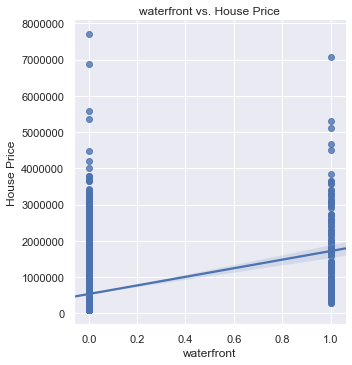

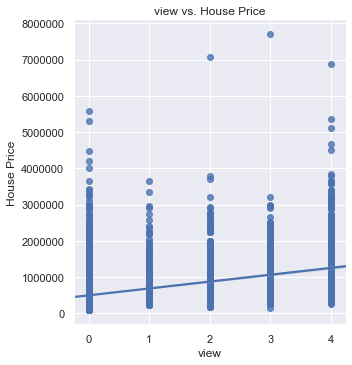

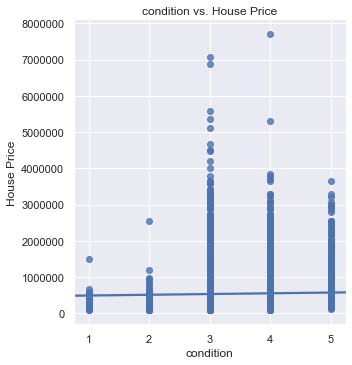

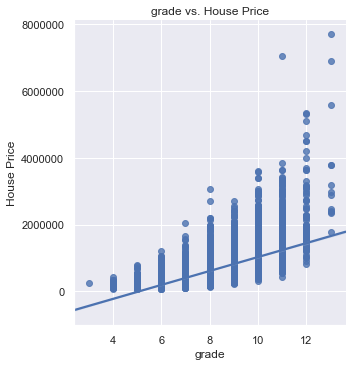

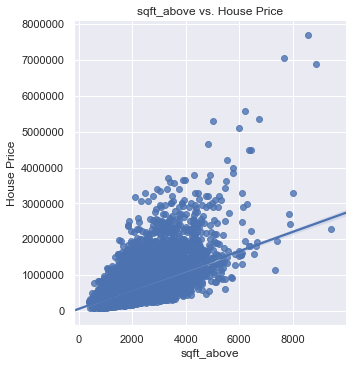

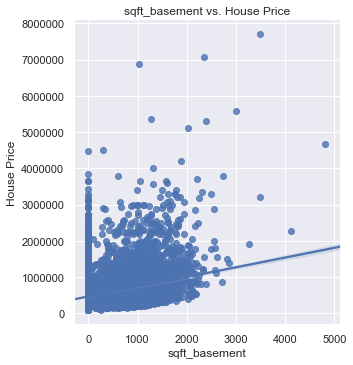

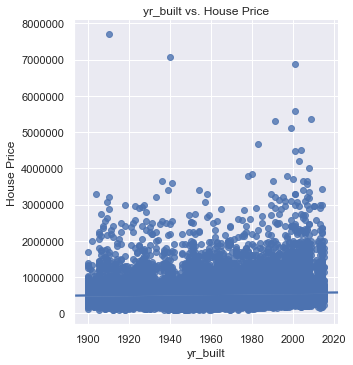

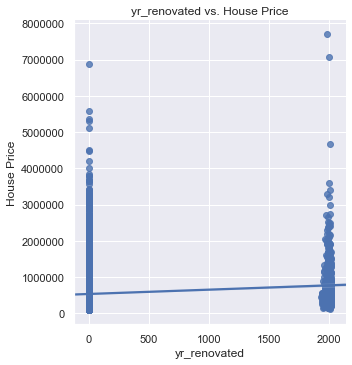

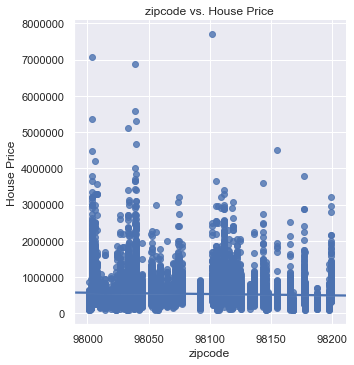

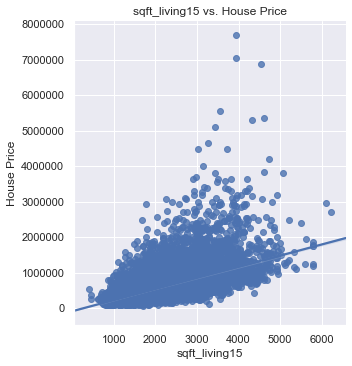

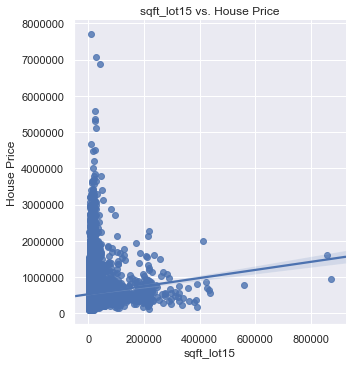

In [14]:
#Now lets see how each of our predictor variables correlate with our target variable: 'price'
for col in pred_columns:
    sns.lmplot(x=col, y='price',data=data)
    plt.title('{} vs. House Price'.format(col))
    plt.xlabel('{}'.format(col))
    plt.ylabel('House Price')
    plt.show()

#### Summary
The following variables seem to have some correlation with housing price:
* sqft_living (A positive correlation: the more square feet of living space a house has, higher the price.)
* grade (A positive correclation.)
* sqft_above (A positive correlation.)

## 3.3 - House Renovation

I will now use the questions I posed above to guide the rest of my exploration. First, does renovating a house increase the sale value of a house? And if it does, what types of renovations cause the largest increase in sale value?

In [15]:
#First, I'm going to change 'yr_renovated' to a category variable, 'renovated'
data['renovated'] = np.where(data['yr_renovated'] == 0.0, '0', '1')
data['renovated'] = data['renovated'].astype('category')

In [16]:
#Next, I need to create a dataframe with houses that have been sold multiple times and have
#been renovated

#This creates a dataframe of houses that have been sold multiple times
mult_sales = data[data.id.duplicated(keep=False)]

#This creates a list of house ids that have been sold multiple times and renovated
ids = mult_sales.loc[mult_sales['renovated'] == '1', ['id']]
ids = ids['id'].tolist()

#Now to make a dataframe with all sales for these houses
rnvt_mult_sales = mult_sales[mult_sales.id.isin(ids)]
rnvt_mult_sales.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0.0,0.0,...,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460,1
325,7520000520,2015-03-11,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460,1
717,8820903380,2014-07-28,452000.0,6,2.25,2660,13579,2.0,0.0,0.0,...,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242,1
718,8820903380,2015-01-02,730000.0,6,2.25,2660,13579,2.0,0.0,0.0,...,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242,1
3946,1825069031,2014-08-14,550000.0,4,1.75,2410,8447,2.0,0.0,3.0,...,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789,1
3947,1825069031,2014-10-16,550000.0,4,1.75,2410,8447,2.0,0.0,3.0,...,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789,1
8426,1721801010,2014-09-03,225000.0,3,1.00,1790,6120,1.0,0.0,0.0,...,1790,0.0,1937,1964.0,98146,47.5080,-122.337,830,6120,1
8427,1721801010,2015-04-24,302100.0,3,1.00,1790,6120,1.0,0.0,0.0,...,1790,0.0,1937,1964.0,98146,47.5080,-122.337,830,6120,1


I thought I would be able to answer these questions with the dataset, but I was wrong. My hope was that when I filtered the original dataframe for houses that had been sold multiple times and had been renovated, I would be able to see if the price of the house went up after the renovation. I was also hoping that I would be able to see which aspects of the house changed after the renovation (like number of bathrooms or square feet of living space), to determine if certain changes to the house would lead to larger resale prices.

However, the dataset did not provide enough information to answer those questions. When I filtered the original King County Data for houses that had been sold multiple times and were rennovated, I was only left with 4 unique house IDs, giving me a dataframe of only eight rows. My questions ended up narrowing the dataset so much that the universe became too small. And on top of that, these four houses had been rennovated prior to both dates of sale, so in addition to being too small, the dataset could no longer answer my questions.

What you are able to do with the dataset is determine whether or not a rennovated house will sell for more than a house that hasn't been rennovated or see if the rennovated houses have more bathrooms, bedrooms, or square feet of living space than houses that haven't.

In [17]:
renov_pr = data.groupby(['renovated'])['price'].mean().sort_values(ascending=False)
renov_pr

renovated
1    768901.892473
0    532140.319858
Name: price, dtype: float64

In [18]:
renov_bed = data.groupby(['renovated'])['bedrooms'].mean().sort_values(ascending=False)
renov_bed

renovated
1    3.459677
0    3.370115
Name: bedrooms, dtype: float64

In [19]:
renov_bath = data.groupby(['renovated'])['bathrooms'].mean().sort_values(ascending=False)
renov_bath

renovated
1    2.306116
0    2.109037
Name: bathrooms, dtype: float64

In [20]:
renov_living = data.groupby(['renovated'])['sqft_living'].mean().sort_values(ascending=False)
renov_living

renovated
1    2327.377688
0    2071.507313
Name: sqft_living, dtype: float64

After some quick checks in the data, it looks like the average price of a renovated home is over 200 thousand dollars more than a home that hasn't been renovated. Renovated homes also seem to have more living space than unrenovated homes. 

## 3.4 - Location

My next question: How big a role does location play into the housing market? Do waterfront properties sell for more?

In [21]:
#Let's first look at some statistical data by zipcode
zip_data = data.groupby(['zipcode'])['price'].median().sort_values(ascending=False)
zip_data.head()

zipcode
98039    1895000.0
98004    1150000.0
98040     993750.0
98112     915000.0
98005     765475.0
Name: price, dtype: float64

In [22]:
zip_data.tail()

zipcode
98188    264000.0
98001    260000.0
98032    249000.0
98168    235000.0
98002    235000.0
Name: price, dtype: float64

Well, after looking at the median price of sale for each zipcode, it's pretty clear that some zipcodes are more desirable than others. The difference in median prices is over 1.6 million dollars! The zipcode 98039 had the highest median price of 1.895 million dollars, while the zipcode 98002 had the lowest median price of 235,000 dollars. 

In [23]:
#Now let's check waterfront properties
waterfront = data.groupby(['waterfront'])['price'].median().sort_values(ascending=False)
waterfront

waterfront
1.0    1510000.0
0.0     450000.0
Name: price, dtype: float64

It looks like houses on the waterfront sell at a median price that is just over million dollars higher than houses that are not on the waterfront.

In [24]:
#By reseting the index of our grouped data, we convert it from a Series back to a dataframe
zip_data = zip_data.reset_index()

#Now I'm going to add a column to the zip_data to sort the zipcodes into groups
conditions = [
    (zip_data['price'] >= 1500000),
    (zip_data['price'] < 1500000) & (zip_data['price'] >= 1100000),
    (zip_data['price'] < 1100000) & (zip_data['price'] >= 700000),
    (zip_data['price'] < 700000) & (zip_data['price'] >= 300000),
    (zip_data['price'] < 300000)
]

choices = ['Group 5: 1.9M - 1.5M ', 'Group 4: 1.5M - 1.1M',
           'Group 3: 1.1M - 700K', 'Group 2: 700K - 300K',
           'Group 1: Below 300K']

zip_data['zip_group'] = np.select(conditions, choices)

In [25]:
#Now to merge these group desginations by zip code to our cleaned dataframe
zip_group = pd.merge(data, zip_data, how='left', on='zipcode')
zip_group.drop(columns='price_y', inplace=True)
zip_group.head()

,id,date,price_x,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,zip_group
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,Group 1: Below 300K
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,Group 2: 700K - 300K
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,Group 2: 700K - 300K
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,Group 2: 700K - 300K
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,Group 2: 700K - 300K


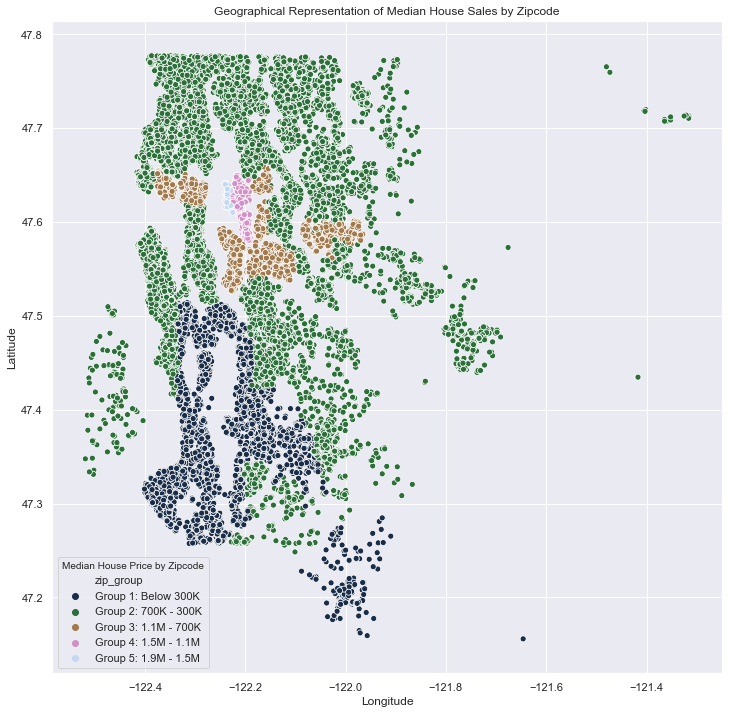

In [26]:
#Now lets try to visualize
fig_1 = plt.figure(figsize = (12,12))
ax = plt.axes()
sns.scatterplot(x='long', y='lat', hue='zip_group', data=zip_group, palette='cubehelix', ax=ax)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Representation of Median House Sales by Zipcode")
plt.legend(title="Median House Price by Zipcode")

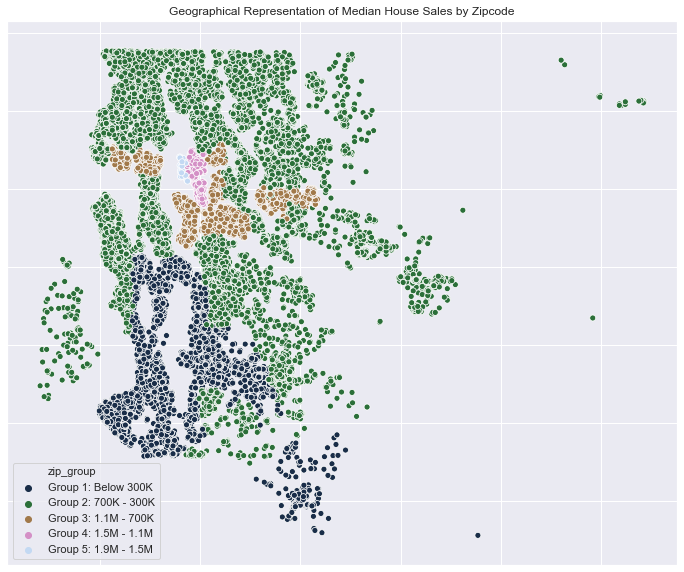

In [27]:
#picture for presentation
fig_2 = plt.figure(figsize = (12,10))
ax = fig_2.add_subplot(111)
sns.scatterplot(x='long', y='lat', hue='zip_group', 
                data=zip_group, palette='cubehelix', ax=ax)
sns.set_style('white')
plt.title("Geographical Representation of Median House Sales by Zipcode")
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.xlabel("")
plt.ylabel("")
plt.savefig('by Zipcode')

Now, it's pretty easy to visualize that zipcode does play a role in the sale price of a house. It looks like Medina and Bellevue (two areas located across Lake Washington from Seattle) have zipcodes in the two highest groups for median house price. Then, the farther away you get from Medina and Bellevue (and from Seattle) the lower the median house price. We can also conclude, based on our previous analysis of houses on the waterfront, that if a house is on a waterfront property, it will likely sell at a higher price than those that are not on the waterfront.

## 3.5 - Size over Time

Now to answer our final questions: More people seem to be downsizing their lives. Getting rid of cars, having less stuff, moving to cities, and buying smaller homes. Does the housing data in King County support this? Are more people buying smaller houses?

Let's first look at just a normal scatter plot to see if we can get a sense of what's happening.

Text(0.5, 1.0, 'Square feet of Living Space over Time')

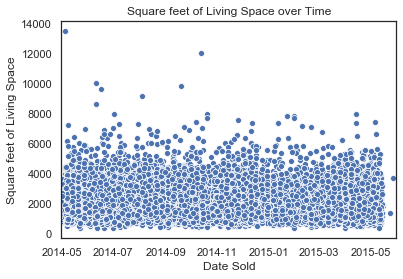

In [28]:
sns.scatterplot(x='date', y='sqft_living', data=data)
plt.xlim('2014-05-01', '2015-05-31')
plt.xlabel('Date Sold')
plt.ylabel('Square feet of Living Space')
plt.title('Square feet of Living Space over Time')

Well, at first glance, our data is inconclusive. There doesn't seem to be any pattern, though only looking at one year of housing data wouldn't be that conclusive anway. To have been able to fully answer that question, we would have required a dataset with at least a couple year's worth of data. 

Instead, let's see if maybe the houses being built are getting smaller?

Text(0.5, 1.0, 'Square feet of Living Space over Time')

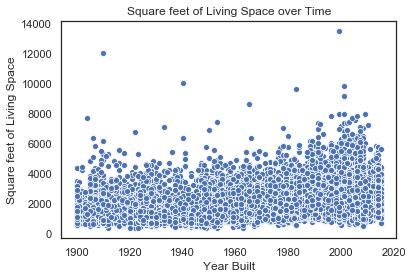

In [29]:
sns.scatterplot(x='yr_built', y='sqft_living', data=data)
plt.xlabel('Year Built')
plt.ylabel('Square feet of Living Space')
plt.title('Square feet of Living Space over Time')

In fact, it looks like as time goes on, larger houses are being built.

In [30]:
#Check to see what the median square feet of living space is by year
by_year = data.groupby(['yr_built'])['sqft_living'].median()
by_year = by_year.reset_index()

Text(0, 0.5, 'Square feet of Living Space')

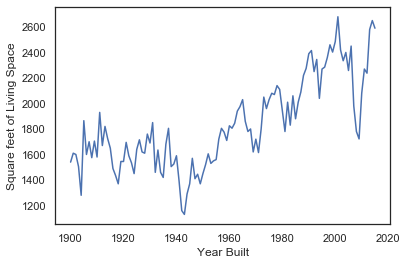

In [31]:
fig = plt.figure()
ax = plt.axes()

ax.plot('yr_built','sqft_living',data=by_year)
plt.xlabel('Year Built')
plt.ylabel('Square feet of Living Space')

(2000, 2016)

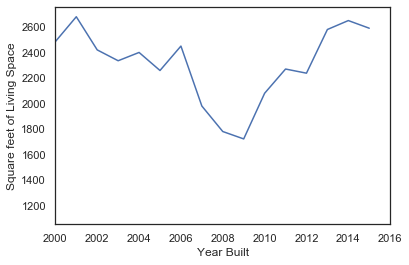

In [32]:
fig = plt.figure()
ax = plt.axes()

ax.plot('yr_built','sqft_living',data=by_year)
plt.xlabel('Year Built')
plt.ylabel('Square feet of Living Space')
plt.xlim(2000,2016)

Historically speaking, it seems houses have only been getting larger since 1900. The median house size built has increased from 1540 sqft in 1900, to 2590 sqft in 2015. That's a 68% increase in the size of the house built.

However, the trend towards downsizing one's life has been a more recent trend, so I chose to visualize the median house size built to just the years 2000 to 2015. But still, even narrowing the scope of years, the house sale data doesn't reflect the public's trend of downsizing. Though the median size of houses built from 2000 to roughly 2009 did decrease, since 2009, the size has increased again almost back to where it was in 2000.

My assumption is that this might be more visible with newer data. If we added data for house sales from 2016 through 2018, we might be able to visualize the downsizing in houses. It is important when working with data to always have the most recent data available, otherwise you'll be working with stale information and the results won't be relevant.

## 4.0 - Model

In [33]:
#Dropping these columns from the data to be used for the model
to_drop = ['id', 'view', 'lat', 'long', 'date', 'yr_renovated']

m_data = data.drop(columns=to_drop)
m_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15', 'renovated'],
      dtype='object')

## 4.1 - Correlation Matrix and Multicollinearity

The first thing we need to do before we create our model for the dataset is visualize a correclation matrix, so we can check for multicollinearity between our predictor variables. If any are strongly correlated with one another, they will need to be removed from the dataframe so as not to cause problems with our model.

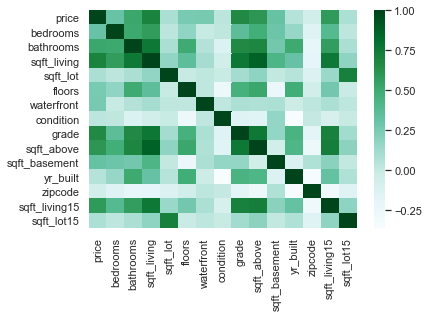

In [34]:
sns.heatmap(m_data.corr(), cmap='BuGn')

It looks like we have some columns that are strongly correlated with one another. Let's check to see if any of those correlations are greater than 0.8 or less than -0.8.

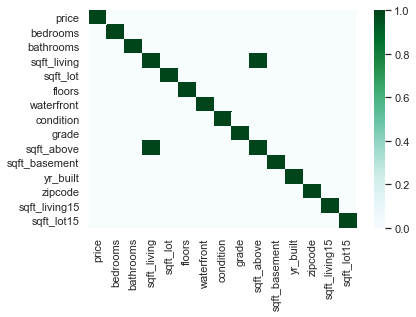

In [35]:
sns.heatmap(abs(m_data.corr())>0.8, cmap='BuGn')

It looks like the following predictor variables have a strong correlation:
* 'sqft_living' and 'sqft_above'

I am going to remove the 'sqft_above' variable, as it is just a subset of the 'sqft_living' variable.

In [36]:
m_data.drop(['sqft_above'], axis=1, inplace=True)

## 4.2 - Categorical Variables

The next step we need to take is transform some of our categorical variables using one-hot-encoding. The following variables are considered categorical variabes, since they are not continuous:
* 'bedrooms'
* 'bathrooms'
* 'floors'
* 'waterfront'
* 'condition'
* 'grade'
* 'renovated'

I'm also going to convert the 'sqft_basement' variable into a categorical variable, since we may have to log transform the continuous data, and the 'sqft_basement' contains 0.0.

In [37]:
bins = [-1, 1, m_data.sqft_basement.max()]
labels = ['0','1']

m_data.sqft_basement = pd.cut(m_data.sqft_basement, bins, labels=labels)

In [38]:
#First I will convert all the variables listed above into categories.
to_cat = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition',
         'grade', 'renovated', 'sqft_basement']

for var in to_cat:
    m_data[var] = m_data[var].astype('category')

#Next, I will create dummy variables for each of these variables, removing the first for each
#variable, so as not to fall into the dummy variable trap
dummies = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']

bedrooms = pd.get_dummies(m_data.bedrooms, prefix='bedroom', drop_first=True)
bathrooms = pd.get_dummies(m_data.bathrooms, prefix='bathroom', drop_first=True)
floors = pd.get_dummies(m_data.floors, prefix='floors', drop_first=True)
condition = pd.get_dummies(m_data.condition, prefix='condition', drop_first=True)
grade = pd.get_dummies(m_data.grade, prefix='grade', drop_first=True)

    
df = m_data.join([bedrooms, bathrooms, floors, condition, grade])
df.drop(dummies, axis=1, inplace=True)

## 4.2 - Transformations and Scaling

With the categorical variables taken care of, we now need to look at transforming and scaling the continuous variables. When generating a model for your data, it may be helpful if the continuous variables are normally distributed. 

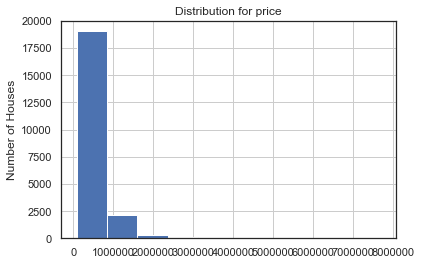

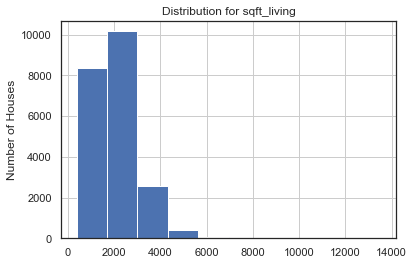

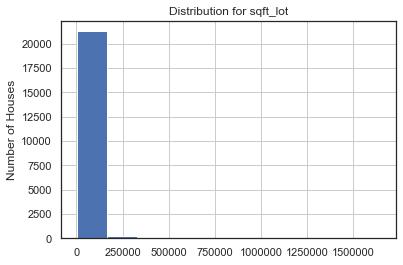

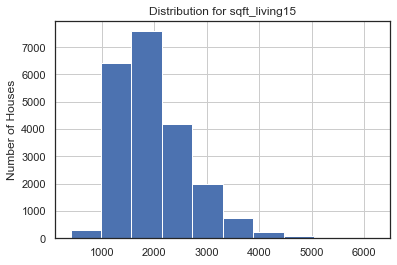

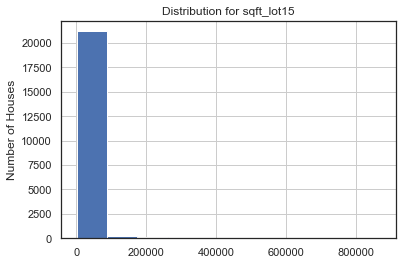

In [39]:
#For the 6 remaining continuous variables, let's check their histograms again
cont_columns = ['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']

for col in cont_columns:
    df[col].hist()
    plt.title('Distribution for {}'.format(col))
    plt.ylabel('Number of Houses')
    plt.show()

None of these seem to be normally distributed, so let's go ahead and transform, then scale the data.

In [40]:
price_log = np.log(df.price)
sqft_living_log = np.log(df.sqft_living)
sqft_lot_log = np.log(df.sqft_lot)
sqft_living15_log = np.log(df.sqft_living15)
sqft_lot15_log = np.log(df.sqft_lot15)

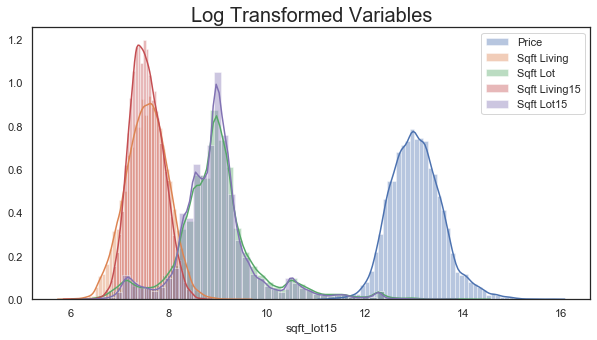

In [41]:
plt.figure(figsize=(10,5))
sns.distplot(price_log, label='Price')
sns.distplot(sqft_living_log, label='Sqft Living')
sns.distplot(sqft_lot_log, label='Sqft Lot')
sns.distplot(sqft_living15_log, label='Sqft Living15')
sns.distplot(sqft_lot15_log, label='Sqft Lot15')

plt.title('Log Transformed Variables', fontdict={'fontsize': 20})
plt.legend()
plt.show()

After log transforming our continuous variables, they all seem to have a more normal distribution. I'm going to normalize the variables now with min-max scaling.

In [42]:
df['price'] = (price_log - min(price_log)) / (max(price_log) - min(price_log))
df['sqft_living'] = (sqft_living_log - min(sqft_living_log)) / (max(sqft_living_log) - min(sqft_living_log))
df['sqft_lot'] = (sqft_lot_log - min(sqft_lot_log)) / (max(sqft_lot_log) - min(sqft_lot_log))
df['sqft_living15'] = (sqft_living15_log - min(sqft_living15_log)) / (max(sqft_living15_log) - min(sqft_living15_log))
df['sqft_lot15'] = (sqft_lot15_log - min(sqft_lot15_log)) / (max(sqft_lot15_log) - min(sqft_lot15_log))

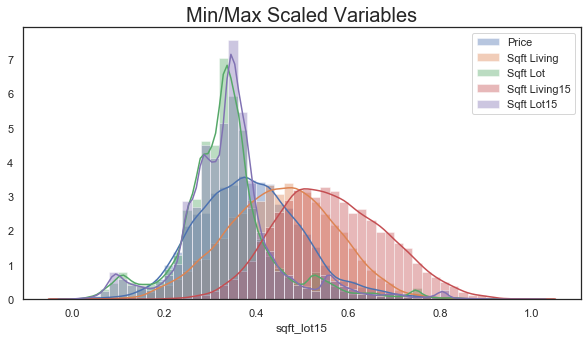

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(df.price, label='Price')
sns.distplot(df.sqft_living, label='Sqft Living')
sns.distplot(df.sqft_lot, label='Sqft Lot')
sns.distplot(df.sqft_living15, label='Sqft Living15')
sns.distplot(df.sqft_lot15, label='Sqft Lot15')

plt.title('Min/Max Scaled Variables', fontdict={'fontsize': 20})
plt.legend()
plt.show()

## 4.3 - Create the Model

With our variables clean, transformed, and scaled, it's time to create our model. Our target variable is 'price' and our predictors are all the other variables we have left in the dataframe.

In [44]:
#Create target variable dataframe
df_target = df.price

#Create dataframe of just predictors
df_features = df.drop(['price'], axis=1)

#Creating Model
def model(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    mod_reg = LinearRegression()
    mod_reg.fit(X_train, y_train)
    y_hat_test = mod_reg.predict(X_test)
    y_hat_train = mod_reg.predict(X_train)
    
    print("R^2 Score: {}".format(mod_reg.score(X,y)))
    print("Train Mean Squared Error: {}".format(mean_squared_error(y_train, y_hat_train)))
    print("Test Mean Squared Error: {}".format(mean_squared_error(y_test, y_hat_test)))
    print('Average Predicted Price:', y_hat_train.mean())
    print('Average Actual Price:', y_test.mean())
    
    plt.figure(figsize=(15,8))
    sns.lineplot(range(len(y_hat_test[:100])), y_hat_test[:100], label='Predicted')
    sns.lineplot(range(len(y_hat_test[:100])), y_test[:100], label='Actual')
    
    plt.title('Predicted price vs Actual price')
    plt.ylabel('House Prices')
    plt.xlabel('Value')
    plt.legend()
    plt.show()
    
    return mod_reg, y_hat_test, y_test

R^2 Score: 0.668225622368479
Train Mean Squared Error: 0.004357323397795563
Test Mean Squared Error: 0.0043791994274519
Average Predicted Price: 0.38780917452835956
Average Actual Price: 0.39088309706051416


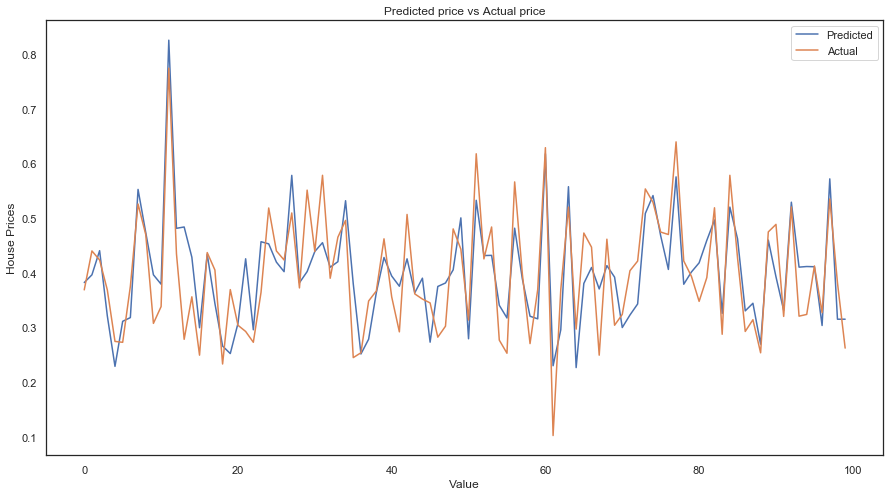

In [45]:
#Using SKlearn
mod_reg, y_hat_test, y_test = model(df_features, df_target)

In [46]:
#OLS
target = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size=0.2)
mod_reg_2 = sm.OLS(y_train, sm.add_constant(X_train.astype(float))).fit()
mod_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     537.5
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:15:52   Log-Likelihood:                 22502.
No. Observations:               17277   AIC:                        -4.487e+04
Df Residuals:                   17210   BIC:                        -4.435e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8493      1.094     -1.690      0.091      -3.994       0.296
sqft_living       0.2561      0.011     24.035      0.000       0.235       0.277
sqft_lot         -0.0124      0.012     -1.036      0.300      -0.036       0.011
waterfront        0.1151      0.006     18.804      0.000       0.103       0.127
sqft_basement     0.0122      0.001      9.296      0.000       0.010       0.015
yr_built         -0.0011   2.85e-05    -39.498      0.000      -0.001      -0.001
zipcode        4.126e-05    1.1e-05      3.762      0.000    1.98e-05    6.28e-05
sqft_living15     0.1908      0.007     26.755      0.000       0.177       0.205
sqft_lot15       -0.0711      0.012     -6.138      0.000      -0.094      -0.048
renovated         0.0117      0.003      4.027      0.000       0.006       0.017
bedroom_2         0.0007      0.006      0.126      0.900      -0.010       0.012
bedroom_3        -0.0201      0.006     -3.532      0.000      -0.031      -0.009
bedroom_4        -0.0264      0.006     -4.532      0.000      -0.038      -0.015
bedroom_5        -0.0271      0.006     -4.420      0.000      -0.039      -0.015
bedroom_6        -0.0329      0.007     -4.425      0.000      -0.048      -0.018
bedroom_7        -0.0420      0.014     -2.916      0.004      -0.070      -0.014
bedroom_8        -0.0276      0.023     -1.178      0.239      -0.073       0.018
bedroom_9        -0.0427      0.034     -1.260      0.208      -0.109       0.024
bedroom_10       -0.0140      0.047     -0.298      0.766      -0.106       0.078
bedroom_11       -0.0751      0.066     -1.133      0.257      -0.205       0.055
bedroom_33        0.0634      0.066      0.958      0.338      -0.066       0.193
bathroom_0.75     0.0838      0.034      2.456      0.014       0.017       0.151
bathroom_1.0      0.0752      0.033      2.276      0.023       0.010       0.140
bathroom_1.25     0.1009      0.040      2.544      0.011       0.023       0.179
bathroom_1.5      0.0741      0.033      2.240      0.025       0.009       0.139
bathroom_1.75     0.0825      0.033      2.495      0.013       0.018       0.147
bathroom_2.0      0.0834      0.033      2.522      0.012       0.019       0.148
bathroom_2.25     0.0867      0.033      2.622      0.009       0.022       0.152
bathroom_2.5      0.0841      0.033      2.542      0.011       0.019       0.149
bathroom_2.75     0.0925      0.033      2.791      0.005       0.028       0.157
bathroom_3.0      0.0982      0.033      2.960      0.003       0.033       0.163
bathroom_3.25     0.1123      0.033      3.381      0.001       0.047       0.177
bathroom_3.5      0.1155      0.033      3.479      0.001       0.050       0.181
bathroom_3.75     0.1361      0.034      4.046      0.000       0.070       0.202
bathroom_4.0      0.1240      0.034      3.681   

With both the Statsmodels and SKLearn linear regression models, we get very similar R^2 values :0.667 and 0.668. Let's see if we can remove some of non-significant features and make our model a bit better.

In [47]:
pvalues = pd.DataFrame(mod_reg_2.pvalues, columns=['p'])
features = list(pvalues[pvalues.p < 0.05].index)

#The following variables can be considered significant, as their p values are less than 0.05.
features

['sqft_living',
 'waterfront',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'sqft_living15',
 'sqft_lot15',
 'renovated',
 'bedroom_3',
 'bedroom_4',
 'bedroom_5',
 'bedroom_6',
 'bedroom_7',
 'bathroom_0.75',
 'bathroom_1.0',
 'bathroom_1.25',
 'bathroom_1.5',
 'bathroom_1.75',
 'bathroom_2.0',
 'bathroom_2.25',
 'bathroom_2.5',
 'bathroom_2.75',
 'bathroom_3.0',
 'bathroom_3.25',
 'bathroom_3.5',
 'bathroom_3.75',
 'bathroom_4.0',
 'bathroom_4.25',
 'bathroom_4.5',
 'bathroom_4.75',
 'bathroom_5.0',
 'bathroom_5.25',
 'bathroom_5.5',
 'bathroom_5.75',
 'bathroom_6.0',
 'bathroom_6.25',
 'bathroom_6.5',
 'bathroom_7.75',
 'bathroom_8.0',
 'floors_1.5',
 'floors_2.0',
 'floors_2.5',
 'floors_3.0',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13']

In [48]:
#I will remove the insignificant values from the model dataframe
df_features_1 = df[features]

X_train, X_test, y_train, y_test = train_test_split(df_features_1, target, test_size=0.2)
mod_reg_3 = sm.OLS(y_train, sm.add_constant(X_train.astype(float))).fit()
mod_reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     590.6
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:15:52   Log-Likelihood:                 21629.
No. Observations:               17277   AIC:                        -4.315e+04
Df Residuals:                   17225   BIC:                        -4.275e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.5983      1.144     -4.020      0.000      -6.840      -2.356
sqft_living       0.3576      0.011     33.460      0.000       0.337       0.379
waterfront        0.1141      0.007     17.396      0.000       0.101       0.127
sqft_basement     0.0124      0.001      9.112      0.000       0.010       0.015
yr_built         -0.0009   2.94e-05    -31.948      0.000      -0.001      -0.001
zipcode        6.556e-05   1.15e-05      5.707      0.000     4.3e-05    8.81e-05
sqft_living15     0.2453      0.007     33.410      0.000       0.231       0.260
sqft_lot15       -0.1104      0.006    -18.799      0.000      -0.122      -0.099
renovated         0.0179      0.003      5.806      0.000       0.012       0.024
bedroom_3        -0.0221      0.002    -12.016      0.000      -0.026      -0.019
bedroom_4        -0.0321      0.002    -14.678      0.000      -0.036      -0.028
bedroom_5        -0.0368      0.003    -12.475      0.000      -0.043      -0.031
bedroom_6        -0.0444      0.005     -8.218      0.000      -0.055      -0.034
bedroom_7        -0.0532      0.013     -4.020      0.000      -0.079      -0.027
bathroom_0.75     0.0510      0.028      1.827      0.068      -0.004       0.106
bathroom_1.0      0.0641      0.026      2.427      0.015       0.012       0.116
bathroom_1.25     0.1153      0.036      3.205      0.001       0.045       0.186
bathroom_1.5      0.0753      0.026      2.851      0.004       0.024       0.127
bathroom_1.75     0.0840      0.026      3.185      0.001       0.032       0.136
bathroom_2.0      0.0831      0.026      3.149      0.002       0.031       0.135
bathroom_2.25     0.0914      0.026      3.461      0.001       0.040       0.143
bathroom_2.5      0.0877      0.026      3.324      0.001       0.036       0.139
bathroom_2.75     0.0969      0.026      3.666      0.000       0.045       0.149
bathroom_3.0      0.0964      0.026      3.638      0.000       0.044       0.148
bathroom_3.25     0.1148      0.027      4.325      0.000       0.063       0.167
bathroom_3.5      0.1133      0.026      4.275      0.000       0.061       0.165
bathroom_3.75     0.1359      0.027      5.011      0.000       0.083       0.189
bathroom_4.0      0.1164      0.027      4.289      0.000       0.063       0.170
bathroom_4.25     0.1355      0.028      4.859      0.000       0.081       0.190
bathroom_4.5      0.1142      0.028      4.135      0.000       0.060       0.168
bathroom_4.75     0.1372      0.031      4.422      0.000       0.076       0.198
bathroom_5.0      0.1191      0.032      3.771      0.000       0.057       0.181
bathroom_5.25     0.1598      0.034      4.746      0.000       0.094       0.226
bathroom_5.5      0.1699      0.036      4.703      0.000       0.099       0.241
bathroom_5.75     0.1320      0.044      2.993   

R^2 Score: 0.6356138723513318
Train Mean Squared Error: 0.004747792707710817
Test Mean Squared Error: 0.0049609609185023605
Average Predicted Price: 0.3885599287527299
Average Actual Price: 0.3878806015201291


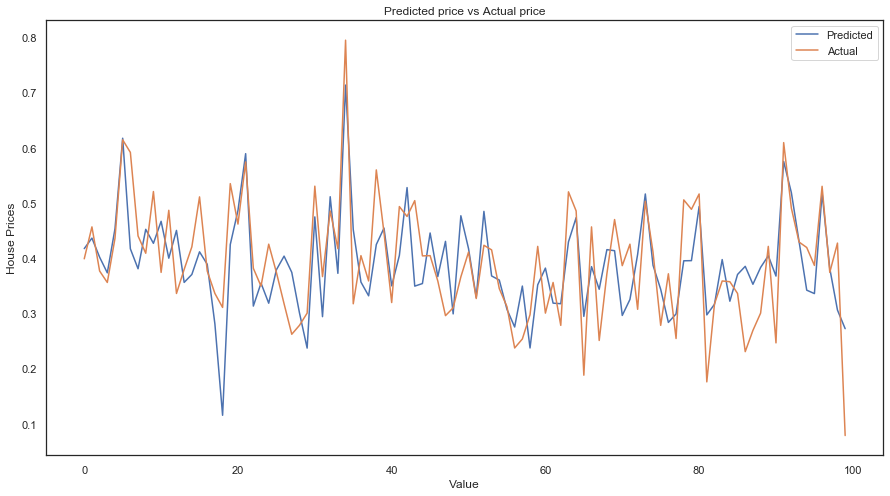

In [49]:
mod_reg_4, y_hat_test, y_test = model(df_features_1, df_target)

After removing the insignificant variables from the model data, the R^2 values for both the Statsmodels and SKLearn models decreased, though at least the insignificant variables have been removed.

## 4.4 - Cross Validation

In [50]:
#Running cross validation on model data with only significant variables
cv_20_results = np.mean(cross_val_score(mod_reg_4, df_features_1, df_target, cv=20,
                                        scoring='r2'))
print("Model Accuracy: {}%".format(round(cv_20_results*100, 2)))

Model Accuracy: 62.89%


The current model performs with 63% accuracy.

## 4.5 - Stepwise Selection

Using the stepwise selection function found in our course material, I decided to try and make the model a little better.

In [51]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):

    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [52]:
result = stepwise_selection(df_features.astype(float), df['price'], verbose=True)
print('resulting features:')
print(result)

Add  grade_10                       with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  sqft_lot                       with p-value 3.83177e-242
Add  grade_11                       with p-value 1.05587e-147
Add  grade_9                        with p-value 5.74302e-216
Add  grade_8                        with p-value 1.34124e-217
Add  grade_12                       with p-value 7.24206e-220
Add  grade_7                        with p-value 6.8438e-145
Add  waterfront                     with p-value 1.95748e-106
Add  grade_13                       with p-value 1.51679e-88
Add  floors_3.0                     with p-value 7.20107e-56
Add  bedroom_2                      with p-value 2.77171e-45
Add  sqft_basement                  with p-value 1.2252e-29
Add  condition_5                    with p-value 1.05277e-27
Add  grade_6                        with p-value 1.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df_features[result], df_target, test_size=0.2)
mod_reg_5 = sm.OLS(y_train, sm.add_constant(X_train.astype(float))).fit()
mod_reg_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     813.3
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:17:32   Log-Likelihood:                 22417.
No. Observations:               17277   AIC:                        -4.475e+04
Df Residuals:                   17233   BIC:                        -4.440e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.9236      1.089     -1.766      0.077      -4.059       0.212
grade_10          0.2197      0.006     38.098      0.000       0.208       0.231
sqft_living15     0.1900      0.007     26.467      0.000       0.176       0.204
sqft_living       0.2537      0.010     24.863      0.000       0.234       0.274
yr_built         -0.0011   2.78e-05    -40.476      0.000      -0.001      -0.001
grade_11          0.2550      0.007     37.649      0.000       0.242       0.268
grade_9           0.1812      0.005     34.022      0.000       0.171       0.192
grade_8           0.1300      0.005     26.033      0.000       0.120       0.140
grade_12          0.3109      0.010     31.631      0.000       0.292       0.330
grade_7           0.0857      0.005     18.000      0.000       0.076       0.095
waterfront        0.1135      0.006     18.228      0.000       0.101       0.126
grade_13          0.3526      0.022     15.728      0.000       0.309       0.397
floors_3.0        0.0532      0.004     14.678      0.000       0.046       0.060
sqft_basement     0.0125      0.001      9.672      0.000       0.010       0.015
condition_5       0.0577      0.006     10.481      0.000       0.047       0.069
grade_6           0.0372      0.005      7.732      0.000       0.028       0.047
floors_2.0        0.0094      0.002      5.905      0.000       0.006       0.012
sqft_lot15       -0.0840      0.006    -14.849      0.000      -0.095      -0.073
bathroom_3.75     0.0474      0.006      7.380      0.000       0.035       0.060
floors_1.5        0.0126      0.002      6.266      0.000       0.009       0.017
bathroom_3.5      0.0305      0.003      9.833      0.000       0.024       0.037
bathroom_3.25     0.0287      0.003      8.754      0.000       0.022       0.035
bedroom_4        -0.0281      0.002    -13.433      0.000      -0.032      -0.024
bathroom_4.25     0.0498      0.008      5.930      0.000       0.033       0.066
condition_4       0.0434      0.005      8.207      0.000       0.033       0.054
renovated         0.0117      0.003      3.968      0.000       0.006       0.017
bathroom_1.5     -0.0105      0.002     -4.751      0.000      -0.015      -0.006
bathroom_1.0     -0.0092      0.002     -4.821      0.000      -0.013      -0.005
zipcode        4.272e-05   1.09e-05      3.905      0.000    2.13e-05    6.42e-05
bathroom_4.0      0.0344      0.007      5.201      0.000       0.021       0.047
bathroom_4.5      0.0423      0.008      5.621      0.000       0.028       0.057
bathroom_4.75     0.0720      0.015      4.850      0.000       0.043       0.101
bathroom_5.25     0.0877      0.024      3.699      0.000       0.041       0.134
bathroom_5.0      0.0662      0.016      4.269      0.000       0.036       0.097
bathroom_6.0      0.1463      0.030      4.818   

R^2 Score: 0.6681776576323029
Train Mean Squared Error: 0.004367154406631273
Test Mean Squared Error: 0.004343034643096052
Average Predicted Price: 0.3880330091755989
Average Actual Price: 0.3899879139122794


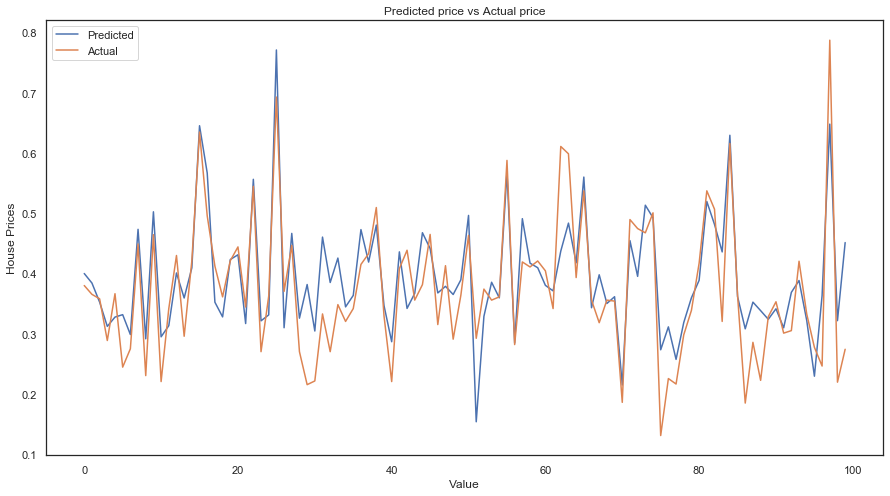

In [54]:
mod_reg_6, y_hat_test, y_test = model(df_features[result], df_target)

In [55]:
cv_20_results = np.mean(cross_val_score(mod_reg_6, df_features[result], df_target, cv=20,
                                        scoring='r2'))
print("Model Accuracy: {}%".format(round(cv_20_results*100, 2)))

Model Accuracy: 66.3%


In [56]:
m_coef = pd.DataFrame()
feats = df_features[result]
predictors = list()
coef = list()
i = 0

for col in feats:
    predictors.append(feats.columns.values[i])
    coef.append(mod_reg_6.coef_[i])
    i += 1
    
m_coef['Predictor'] = predictors
m_coef['Coefficient'] = coef
m_coef.sort_values(by=['Coefficient'], ascending=False).head(5)

,Predictor,Coefficient
10,grade_13,0.353584
7,grade_12,0.306660
4,grade_11,0.259556
2,sqft_living,0.253302
42,bathroom_7.75,0.236655


Well, adding the predictor variables certainly helped generate a better model. The R^2 value increased from 0.63 to 0.67, with only significant variables included. The model also performs 3% better than the previous model. It looks like the grade of the house, the number of bathrroms, and the amount of living space have the highest impact on predicting house prices.

# 5.0 - One more try

Before I wrap up this project, I want to try once more to make a better model, this time by lowering the threshold for multicollinearity from 0.8 to 0.75.

In [57]:
#Import new data and all cleaning steps
data_2 = pd.read_csv('kc_house_data.csv')

data_2.date = pd.to_datetime(data_2.date)
data_2.loc[data_2.sqft_basement == '?', 'sqft_basement'] = 0.0
data_2.sqft_basement = data_2.sqft_basement.astype('float64')
data_2.waterfront.fillna(0, inplace = True)
data_2.view.fillna(0, inplace = True)
data_2.yr_renovated.fillna(0, inplace = True)
data_2.drop(columns=['id', 'date', 'lat', 'long'], inplace=True)

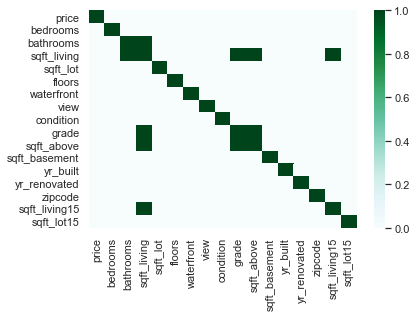

In [58]:
sns.heatmap(abs(data_2.corr())>0.75, cmap='BuGn')

In [59]:
data_2.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,-0.053402,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.280102,-0.010722
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,0.073939,0.028923,0.083823,0.030658
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090339,0.085059,0.278928,0.073083
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.756073,0.165843,0.447865,0.015623,-0.185771,0.713867,0.120981


In [60]:
data_2.drop(columns=['sqft_living15', 'sqft_above', 'grade', 
                     'condition', 'zipcode', 'sqft_lot15'],
            inplace=True)

In [61]:
data_2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')

In [62]:
#Categorical Variables
bins = [-1, 1, data_2.sqft_basement.max()]
labels = ['0','1']
data_2.sqft_basement = pd.cut(data_2.sqft_basement, bins, labels=labels)

bins_2 = [ -1 , 1 , data_2.yr_renovated.max() ]
data_2.yr_renovated = pd.cut(data_2.yr_renovated, bins_2, labels=labels)

In [63]:
#More Categoricals
to_cat = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view']

for var in to_cat:
    data_2[var] = data_2[var].astype('category')
    
dummies = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view']

bedrooms = pd.get_dummies(data_2.bedrooms, prefix='bedroom', drop_first=True)
bathrooms = pd.get_dummies(data_2.bathrooms, prefix='bathroom', drop_first=True)
floors = pd.get_dummies(data_2.floors, prefix='floors', drop_first=True)
waterfront = pd.get_dummies(data_2.waterfront, prefix='waterfront', drop_first=True)
view = pd.get_dummies(data_2.view, prefix='view', drop_first=True)

    
df_2 = data_2.join([bedrooms, bathrooms, floors, waterfront, view])
df_2.drop(dummies, axis=1, inplace=True)

In [64]:
#Transformations and Scaling
price_log = np.log(df_2.price)
sqft_living_log = np.log(df_2.sqft_living)
sqft_lot_log = np.log(df_2.sqft_lot)

df_2['price'] = (price_log - min(price_log)) / (max(price_log) - min(price_log))
df_2['sqft_living'] = (sqft_living_log - min(sqft_living_log)) / (max(sqft_living_log) - min(sqft_living_log))
df_2['sqft_lot'] = (sqft_lot_log - min(sqft_lot_log)) / (max(sqft_lot_log) - min(sqft_lot_log))

In [65]:
#Create target variable dataframe
df2_target = df_2.price

#Create dataframe of just predictors
df2_features = df_2.drop(['price'], axis=1)

R^2 Score: 0.5690053774973258
Train Mean Squared Error: 0.005598584462449534
Test Mean Squared Error: 0.005936146968657957
Average Predicted Price: 0.38818022257465745
Average Actual Price: 0.3893991625475713


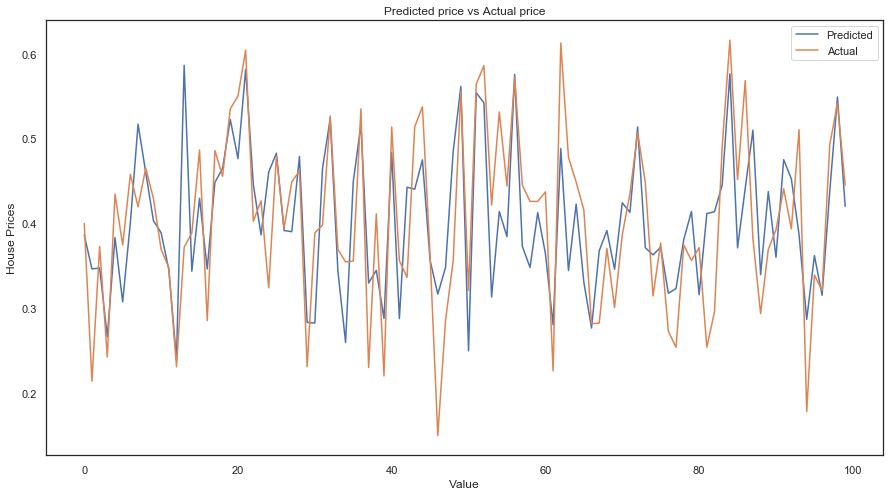

In [66]:
mod_reg, y_hat_test, y_test = model(df2_features, df2_target)

In [67]:
#OLS
target = df_2[['price']]
X_train, X_test, y_train, y_test = train_test_split(df2_features, target, test_size=0.2)
mod_reg_2 = sm.OLS(y_train, sm.add_constant(X_train.astype(float))).fit()
mod_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     425.1
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:17:38   Log-Likelihood:                 20252.
No. Observations:               17277   AIC:                        -4.039e+04
Df Residuals:                   17222   BIC:                        -3.997e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.8556      0.069     27.001      0.000       1.721       1.990
sqft_living        0.6862      0.010     69.090      0.000       0.667       0.706
sqft_lot          -0.0677      0.006    -10.600      0.000      -0.080      -0.055
sqft_basement     -0.0010      0.001     -0.707      0.480      -0.004       0.002
yr_built          -0.0009   2.95e-05    -31.296      0.000      -0.001      -0.001
yr_renovated       0.0041      0.003      1.246      0.213      -0.002       0.011
bedroom_2         -0.0140      0.007     -2.118      0.034      -0.027      -0.001
bedroom_3         -0.0494      0.007     -7.473      0.000      -0.062      -0.036
bedroom_4         -0.0611      0.007     -8.987      0.000      -0.074      -0.048
bedroom_5         -0.0739      0.007    -10.370      0.000      -0.088      -0.060
bedroom_6         -0.1054      0.009    -12.222      0.000      -0.122      -0.088
bedroom_7         -0.1344      0.016     -8.344      0.000      -0.166      -0.103
bedroom_8         -0.1101      0.025     -4.431      0.000      -0.159      -0.061
bedroom_9         -0.1315      0.035     -3.799      0.000      -0.199      -0.064
bedroom_10        -0.1107      0.045     -2.479      0.013      -0.198      -0.023
bedroom_11        -0.1835      0.075     -2.430      0.015      -0.331      -0.035
bedroom_33         0.0469      0.075      0.622      0.534      -0.101       0.195
bathroom_0.75      0.0859      0.039      2.196      0.028       0.009       0.163
bathroom_1.0       0.0817      0.038      2.173      0.030       0.008       0.155
bathroom_1.25      0.1229      0.047      2.610      0.009       0.031       0.215
bathroom_1.5       0.0841      0.038      2.235      0.025       0.010       0.158
bathroom_1.75      0.0926      0.038      2.462      0.014       0.019       0.166
bathroom_2.0       0.0873      0.038      2.319      0.020       0.014       0.161
bathroom_2.25      0.1004      0.038      2.667      0.008       0.027       0.174
bathroom_2.5       0.0963      0.038      2.557      0.011       0.022       0.170
bathroom_2.75      0.1086      0.038      2.882      0.004       0.035       0.183
bathroom_3.0       0.1090      0.038      2.888      0.004       0.035       0.183
bathroom_3.25      0.1426      0.038      3.771      0.000       0.068       0.217
bathroom_3.5       0.1436      0.038      3.800      0.000       0.070       0.218
bathroom_3.75      0.1671      0.038      4.364      0.000       0.092       0.242
bathroom_4.0       0.1683      0.038      4.389      0.000       0.093       0.243
bathroom_4.25      0.1774      0.039      4.570      0.000       0.101       0.254
bathroom_4.5       0.1597      0.039      4.131      0.000       0.084       0.235
bathroom_4.75      0.2060      0.042      4.885      0.000       0.123       0.289
bathroom_5.0

# 6.0 - Interpret

Our first model was better, especially after adding predictor variables stepwise to the model. With a 66% percent accuracy rate, and an R^2 value of 0.67, the first model showed us that the grade and square footage of the house had the highest impact on house price. With this model, we can reject the null hypothesis, as all the variables used to create the model have a p.value less than 0.05.

In second round, I tried to lower the threshold for multicollinearity from 0.8 down to 0.75, thus removing more column initially in an attempt to create a better model. Unfortunately, that was not the case and I ended up with a worse model than before.

There were a multitude of things I could have done differently to try and get a better model. I could have tried to group zipcode and year built in ways that would allow for them to be more significant, I could have transformed and scaled the data in different ways, and I could have removed all outliers outside a certain quantile for each variable with large amounts of outliers.

## 7.0 - Summary

I used the OSEMN process to clean, explore, and model the King County House Sales dataset. The predictive model built, certainly not perfect, fit the data well enough to predict house sales in King County, Washington. With further investigations into transforming the data and using other regression models, I believe a better predicitive model can be built.